In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### 1. Adapt your local path to the model output files

In [2]:
filepath = '/LimnoSES/simdata'

In [3]:
import myutils # some functions to sort and aggregate simulation data

# Experiment evaluation "TurbidityResponse_demo"

In [6]:
runs = range(1, 6, 1)
#baseline = ['true','false']
experiment = ['homoOwners','homoOwnersSocial','homoOwnersEnforced']
wtu = np.arange(0.1, 0.45, 0.1)
init_nutrient = 2.5
nutrient = 2.5

### 2. Check that model output files are available

In [8]:
df_ticks = pd.read_csv(filepath+'/SewageControl_Scen'+str(experiment[1])+'_w'+str(wtu[1])+'_n0'+str(init_nutrient)+'_n'+str(nutrient)+'_agents_R'+str(runs[1])+'.csv', index_col=(5, 0))
df_ticks.iloc[0:10,0:7]

id  compliance time-lag  oss
  year                              
  1     66         0.2     none    0
  1     33         0.2     none    0
  1     56         0.2     none    0
  1      8         0.2     none    0
  1     46         0.2     none    0
  1     36         0.2     none    0
  1     57         0.2     none    0
  1     47         0.2     none    0
  1     97         0.2     none    0
  1     83         0.2     none    0

### 3. Now load and evaluate all data

In [10]:
yearsInf = zeros((len(wtu),len(experiment),len(runs)))
maxEff = zeros_like(yearsInf)
yearsHalfUpgrade = zeros_like(yearsInf)
avgTimeLag = zeros_like(yearsInf)
wtus = range(0,len(wtu),1)
dfA = 0

In [11]:
for i in range(0, 3, 1): # for the different experiments
    for k in wtus:       # for all varied values of willingness-to-upgrade
        for j in runs:   # all repetitions
            
            # start with the agent-based file
            df_years = pd.read_csv(filepath+'/SewageControl_Scen'+str(experiment[i])+'_w'+str(wtu[k])+'_n0'+str(init_nutrient)+'_n'+str(nutrient)+'_agents_R'+str(j)+'.csv', index_col=(1, 0), na_values='none')
            df_years = df_years.sortlevel() # first along id's, then years

            dfA, yearsInf[k,i,j-1] = myutils.dfSim_to_dfAgent(df_years) # see function below 
            avgTimeLag[k,i,j-1] = dfA['time-lag'].mean()

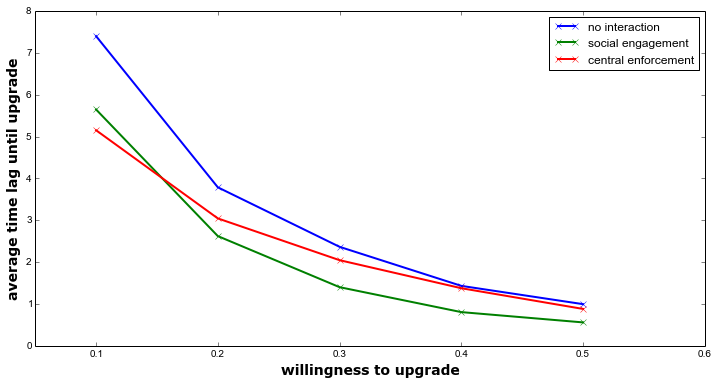

In [13]:
figure(figsize=(12,6))
plot(wtu,mean(avgTimeLag,2),'x-',linewidth=2)
ylabel('average time lag until upgrade', fontweight='bold',fontsize=14)
xlim([0.05,0.6])
xlabel('willingness to upgrade',fontweight='bold',fontsize=14)
legend(['no interaction','social engagement','central enforcement'])

savefig("images/TimeLag_compl.pdf", format="pdf")